In [52]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import imageio
import os
from PIL import Image


#import sys
#sys.path 
#!{sys.executable} -m pip install --upgrade pip
#!{sys.executable} -m pip install -q -U keras-tuner
import keras_tuner as kt



tr = pd.read_csv('data/XYtr.csv')
tr1 =tr.copy() 
tr1['cdate'] = pd.to_datetime(tr1['cdate']).values.astype(np.float64)/8.64e+13
tr1 = tr1.fillna(0)


pred = pd.read_csv('data/pred.csv')

te = pd.read_csv('data/Xte.csv')
te1 = te.copy()
te1['cdate'] = pd.to_datetime(te1['cdate']).values.astype(np.float64)/8.64e+13
te1 = te1.fillna(0)

zz = np.zeros([tr1.shape[0],28,28])
yy = pd.qcut(tr1['total'], 10, labels = range(10))

found = list()
for ii in range(tr1.shape[0]):
    if ii % 100 == 0:
        print('%d / %d' % (ii, tr1.shape[0]))
    if tr1['ext'][ii] == '.png':
        id = tr1.loc[ii,'id']
        ff = tr1.loc[ii, 'id'] + tr1.loc[ii, 'ext']
        path = 'data/images/images/' + ff
        if not os.path.isfile(path):
            continue
        
        pic = imageio.imread(path)
        pic = Image.fromarray(pic).resize((28,28))
        
        try:
            pic = np.mean(pic,axis = 2)
        except:
            pic = np.array(pic)
        
        found.append(ii)
        # print(pic.shape)
        zz[ii,:,:] = pic


#zz = zz/255

zzte = np.zeros([tr1.shape[0],28,28])
found = list()
for ii in range(te1.shape[0]):
    if ii % 100 == 0:
        print('%d / %d' % (ii, te1.shape[0]))
    if te1['ext'][ii] == '.png':
        id = te1.loc[ii,'id']
        ff = te1.loc[ii, 'id'] + te1.loc[ii, 'ext']
        path = 'data/images/images/' + ff
        if not os.path.isfile(path):
            continue
        
        pic = imageio.imread(path)
        pic = Image.fromarray(pic).resize((28,28))
        
        try:
            pic = np.mean(pic,axis = 2)
        except:
            pic = np.array(pic)
        
        found.append(ii)
        # print(pic.shape)
        zzte[ii,:,:] = pic
        
#zzte = zzte/255



0 / 6914
100 / 6914
200 / 6914
300 / 6914
400 / 6914
500 / 6914
600 / 6914
700 / 6914
800 / 6914
900 / 6914
1000 / 6914
1100 / 6914
1200 / 6914
1300 / 6914
1400 / 6914
1500 / 6914
1600 / 6914
1700 / 6914
1800 / 6914
1900 / 6914
2000 / 6914
2100 / 6914
2200 / 6914
2300 / 6914
2400 / 6914
2500 / 6914
2600 / 6914
2700 / 6914
2800 / 6914
2900 / 6914
3000 / 6914
3100 / 6914
3200 / 6914
3300 / 6914
3400 / 6914
3500 / 6914
3600 / 6914
3700 / 6914
3800 / 6914
3900 / 6914
4000 / 6914
4100 / 6914
4200 / 6914
4300 / 6914
4400 / 6914
4500 / 6914
4600 / 6914
4700 / 6914
4800 / 6914
4900 / 6914
5000 / 6914
5100 / 6914
5200 / 6914
5300 / 6914
5400 / 6914
5500 / 6914
5600 / 6914
5700 / 6914
5800 / 6914
5900 / 6914
6000 / 6914
6100 / 6914
6200 / 6914
6300 / 6914
6400 / 6914
6500 / 6914
6600 / 6914
6700 / 6914
6800 / 6914
6900 / 6914
0 / 6914
100 / 6914
200 / 6914
300 / 6914
400 / 6914
500 / 6914
600 / 6914
700 / 6914
800 / 6914
900 / 6914
1000 / 6914
1100 / 6914
1200 / 6914
1300 / 6914
1400 / 6914
1500

In [45]:
zz_min = zz.min(axis=0,keepdims = True)
zz_max = zz.max(axis = 0, keepdims = True)
zz1 = (zz - zz_min)/(zz_max - zz_min)
zzte_min = zzte.min(axis=0,keepdims = True)
zzte_max = zzte.max(axis = 0, keepdims = True)
zzte1 = (zzte - zzte_min)/(zzte_max - zzte_min)

In [54]:
zz = zz/255
zzte = zzte/255

In [55]:
zzte

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.75098039,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.75098039,
         0.        , 0.        ],
        ...,
        [0.3372549 , 0.37745098, 0.47352941, ..., 0.47352941,
         0.3745098 , 0.33431373],
        [0.26568627, 0.27941176, 0.34117647, ..., 0.33627451,
         0.26960784, 0.24509804],
        [0.        , 0.12745098, 0.17254902, ..., 0.15882353,
         0.07352941, 0.        ]],

       [[0.25      , 0.25      , 0.25      , ..., 0.25      ,
         0.25      , 0.25      ],
        [0.25      , 0.25      , 0.25      , ..., 0.25      ,
         0.25      , 0.25      ],
        [0.25      , 0.25      , 0.25      , ..., 0.25      ,
         0.25      , 0.25      ],
        ...,
        [0.25      , 0.25      , 0.25      , ..., 0.25      ,
         0.25      , 0.25      ],
        [0.2

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
model.compile(optimizer = 'adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])
model.fit(zz, yy, epochs = 50)


#prof code
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(zzte)
result = np.argmax(predictions,axis = 1)
qq = np.quantile(tr['total'],q = np.array(range(1,11))/11)
result2 = qq[result]
result3 = result2
result3[~np.array(found)] = np.median(tr1['total'])
pred_i = pred.copy()
pred_i['total'] = result3
#pred_i.to_csv('/Users/tanlu/Desktop/~/2021 Fall/Stat 440/project2/stat440-21-project2/pred_i.csv', index = False)

Epoch 1/50


C:\Users\Benson\anaconda3\envs\tf\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


217/217 [==============================] - 0s 704us/step - loss: 2.3063 - accuracy: 0.1121
Epoch 2/50
217/217 [==============================] - 0s 634us/step - loss: 2.2871 - accuracy: 0.1187
Epoch 3/50
217/217 [==============================] - 0s 623us/step - loss: 2.2731 - accuracy: 0.1255
Epoch 4/50
217/217 [==============================] - 0s 637us/step - loss: 2.2651 - accuracy: 0.1332
Epoch 5/50
217/217 [==============================] - 0s 808us/step - loss: 2.2566 - accuracy: 0.1446
Epoch 6/50
217/217 [==============================] - 0s 674us/step - loss: 2.2489 - accuracy: 0.1471
Epoch 7/50
217/217 [==============================] - 0s 715us/step - loss: 2.2418 - accuracy: 0.1496
Epoch 8/50
217/217 [==============================] - 0s 729us/step - loss: 2.2322 - accuracy: 0.1501
Epoch 9/50
217/217 [==============================] - 0s 641us/step - loss: 2.2249 - accuracy: 0.1550
Epoch 10/50
217/217 [==============================] - 0s 637us/step - loss: 2.2202 - accurac

In [2]:
# cnn

def create_cnn(width = 28, height = 28, regress = False):
    inputShape = (height,width)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3 ,activation = 'relu',input_shape = (28,28,1),padding = "same"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
    model.add(tf.keras.layers.Conv2D(filters = 64,kernel_size = 3 ,activation = 'relu',padding = "same"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
    model.add(tf.keras.layers.Conv2D(filters = 128,kernel_size = 3 ,activation = 'relu',padding = "same"))

    model.add(tf.keras.layers.Flatten())
    #model.add(tf.keras.layers.Dense(128, activation = 'relu'))
    #model.add(tf.keras.layers.Dropout(0.5))
    #model.add(tf.keras.layers.Dense(64, activation = 'relu'))
    #model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
    #if regress:
    #    model.add(tf.keras.layers.Dense(1, activation="linear"))
    return model

In [3]:
def mae_out(model):
    kfold = KFold(n_splits = 5,shuffle = True, random_state = 1)
    a = np.zeros(shape = 5,dtype = int)
    i = 0
    for train_index, test_index in kfold.split(X):
        X_train,X_test = X[train_index],X[test_index]
        y_train,y_test = y[train_index],y[test_index]
        Z_train,z_test = z[train_index],z[test_index]
        model.fit([X_train, Z_train],y_train)
        mae= mean_absolute_error(y_test,model.predict([X_test,z_test]))
        a[i] = mae
        i = i+1
    return(np.mean(a))


In [4]:
def create_mlp(dim, regress = False):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(8, input_dim = dim, activation = "relu"))
    model.add(tf.keras.layers.Dense(8, activation = "relu"))
    
    if regress:
        model.add(tf.keras.layers.Dense(1,activation = "linear"))
    return model

In [8]:
import pandas as pd
import numpy as np

# Read data

XYtr = pd.read_csv('data/XYtr.csv')
#tr_result3 = pd.read_csv('data/result3.csv')
tr_result3 = pred_i
XYtr1 = XYtr.copy() # from stackoverflow
XYtr1['cdate'] = pd.to_datetime(XYtr1['cdate']).values.astype(np.float64)/8.64e+13

Ytr1 = XYtr1['total'].copy()
Xtr1 = XYtr1[['X.sales', 'cdate', 'fee1', 'fee2']].copy()

Xtr1_result3 = pd.concat([Xtr1,tr_result3], axis = 1)
Xtr1 = Xtr1_result3
Xtr1.drop('id',1, inplace = True)
Xtr1 = Xtr1.astype(np.float64)
Xtr1 = Xtr1.fillna(0)
Xtr1

C:\Users\Benson\AppData\Local\Temp/ipykernel_16872/515210108.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Xtr1.drop('id',1, inplace = True)


,X.sales,cdate,fee1,fee2,total
0,1.0,18012.0,250.0,500.0,0.015
1,42.0,18561.0,250.0,500.0,0.120
2,3.0,18012.0,750.0,1000.0,0.150
3,4.0,18012.0,750.0,1000.0,0.120
4,1.0,18012.0,300.0,550.0,0.120
...,...,...,...,...,...
6909,3.0,18593.0,750.0,1000.0,0.120
6910,2.0,18012.0,750.0,1000.0,0.007
6911,2.0,18024.0,0.0,250.0,0.150
6912,2.0,18790.0,200.0,450.0,0.120


In [9]:
pred = pd.read_csv('data/pred.csv')

Xte = pd.read_csv('data/Xte.csv')
#te_pred = pd.read_csv('data/pred_i.csv')
te_pred = pred_i
Xte1 = Xte.copy()
Xte1['cdate'] = pd.to_datetime(Xte1['cdate']).values.astype(np.float64)/8.64e+13
Xte1 = Xte1[['X.sales', 'cdate', 'fee1', 'fee2']].copy()
Xte1_pred = pd.concat([Xte1,te_pred], axis = 1)
Xte1 = Xte1_pred
Xte1.drop('id',1, inplace = True)
Xte1 = Xte1.astype(np.float64)
Xte1 = Xte1.fillna(0)
Xte1

C:\Users\Benson\AppData\Local\Temp/ipykernel_16872/2139974913.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Xte1.drop('id',1, inplace = True)


,X.sales,cdate,fee1,fee2,total
0,2.0,18039.456434,350.0,600.0,0.015
1,1.0,18012.925821,250.0,500.0,0.120
2,12.0,18262.557613,0.0,250.0,0.150
3,1.0,18715.717609,0.0,250.0,0.120
4,1.0,18012.925943,250.0,500.0,0.120
...,...,...,...,...,...
6909,1.0,18520.500267,1000.0,1250.0,0.120
6910,1.0,18012.925743,0.0,250.0,0.007
6911,1.0,18012.925814,750.0,1000.0,0.150
6912,1.0,18012.925943,250.0,500.0,0.120


In [10]:
# text
Xtr_ft = pd.read_csv('data/XYtr_ft.csv')
Xtr_ft1 = Xtr_ft.copy()
Xtr_ft1.drop('id',1, inplace = True)
Xtr_ft1 = Xtr_ft1.fillna(0)

Xte_ft = pd.read_csv('data/Xte_ft.csv')
Xte_ft1 = Xte_ft.copy()
Xte_ft1.drop('id',1, inplace = True)
Xte_ft1 = Xte_ft1.fillna(0)

C:\Users\Benson\AppData\Local\Temp/ipykernel_16872/244462090.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Xtr_ft1.drop('id',1, inplace = True)
C:\Users\Benson\AppData\Local\Temp/ipykernel_16872/244462090.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Xte_ft1.drop('id',1, inplace = True)


In [11]:
Xtr5 = pd.concat([Xtr1, Xtr_ft1], axis = 1)
Xte5 = pd.concat([Xte1, Xte_ft1], axis = 1)
Xte5 = Xte5.astype(np.float64)
Xte5 = Xte5.fillna(0)

In [6]:
Xtr5 = pd.read_csv('data/Xtr_tsvd.csv')
Xte5 = pd.read_csv('data/Xte_tsvd.csv')

In [9]:
mlp = create_mlp(Xtr5.shape[1], regress = False)
combinedInput = tf.keras.layers.concatenate([mlp.output,probability_model.output])
# combinedInput = tf.keras.layers.concatenate([mlp.output,cnn.output])

x = tf.keras.layers.Dense(4, activation="relu")(combinedInput)
x = tf.keras.layers.Dense(1, activation="linear")(x)
# our final model will accept categorical/numerical data on the MLP
# input and images on the CNN input, outputting a single value (the
# predicted price of the house)
model = tf.keras.Model(inputs=[mlp.input, probability_model.input], outputs=x)

In [10]:
from sklearn.preprocessing import StandardScaler

opt = tf.keras.optimizers.Adam(learning_rate=1e-4, epsilon = 0.1)
model.compile(loss="mean_absolute_error", optimizer=opt,metrics = ['accuracy'])

scaler = StandardScaler()
scaler.fit(Xtr5)

X = scaler.fit_transform(Xtr5)

y = yy

z = zz

print(mae_out(model))

173/173 [==============================] - 0s 834us/step - loss: 3.8991 - accuracy: 0.1114
3.4


In [11]:
model.fit([X,z],y)

217/217 [==============================] - 0s 845us/step - loss: 3.8044 - accuracy: 0.1059


In [13]:
Xt = scaler.transform(Xte5)
predictions = model.predict([Xt,zzte])
result = np.argmax(predictions,axis = 1)
qq = np.quantile(tr['total'],q = np.array(range(1,11))/11)
result2 = qq[result]
result3 = result2
result3[~np.array(found)] = np.median(tr1['total'])
pred_i = pred.copy()
pred_i['total'] = result3

In [15]:
pred_i.to_csv('data/pred_cnnmlp_qq.csv', index = False)

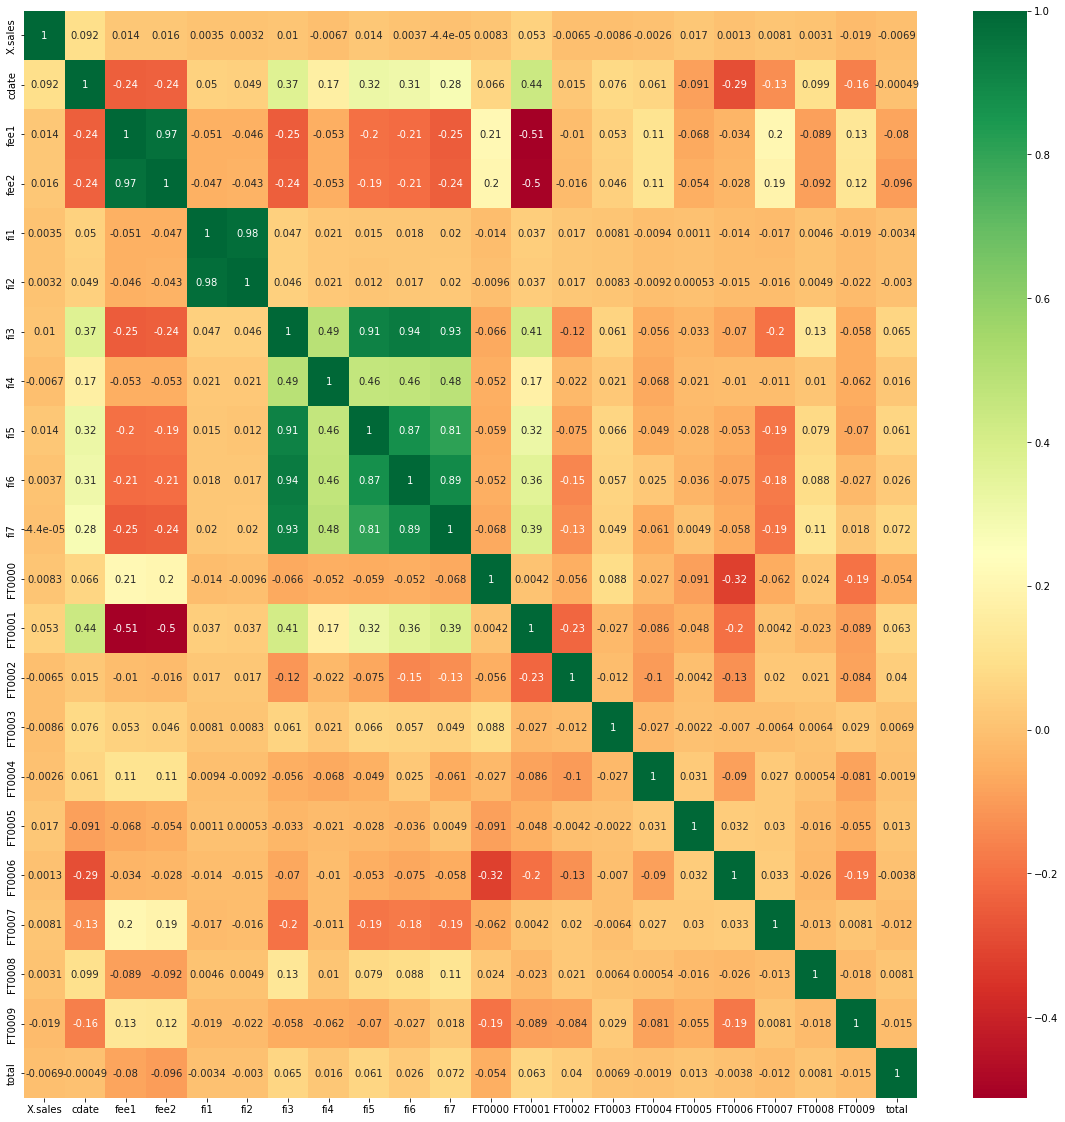

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.concat([Xtr5,tr['total']], axis = 1)
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))

g = sns.heatmap(data[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

[0.04784687 0.08513264 0.11461665 0.06673258 0.01950908 0.00373251
 0.07324618 0.03180877 0.0945445  0.07747492 0.05356031 0.03132546
 0.04022188 0.03507241 0.02513223 0.03885863 0.0274817  0.0326192
 0.03761353 0.03008126 0.03338869]


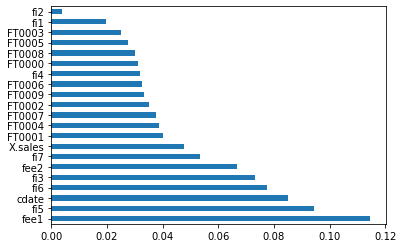

In [26]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
X = Xtr5
y = tr['total']
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(21).plot(kind = 'barh')
plt.show()

In [27]:
Xtr6 = Xtr5[['fee1','fi5','cdate','fi6','fi3','fee2','fi7','X.sales']].copy()
Xte6 = Xte5[['fee1','fi5','cdate','fi6','fi3','fee2','fi7','X.sales']].copy()

In [28]:
Xtr6

,fee1,fi5,cdate,fi6,fi3,fee2,fi7,X.sales
0,250.0,77.377778,18012.0,118.466667,140.476667,500.0,122.182222,1.0
1,250.0,205.847619,18561.0,156.717460,167.661376,500.0,140.419048,42.0
2,750.0,0.000000,18012.0,0.000000,0.000000,1000.0,0.000000,3.0
3,750.0,0.000000,18012.0,0.000000,0.000000,1000.0,0.000000,4.0
4,300.0,127.768889,18012.0,195.306667,174.823704,550.0,201.395556,1.0
...,...,...,...,...,...,...,...,...
6909,750.0,0.000000,18593.0,0.000000,0.000000,1000.0,0.000000,3.0
6910,750.0,0.000000,18012.0,0.000000,0.000000,1000.0,0.000000,2.0
6911,0.0,47.142857,18024.0,155.347619,169.058333,250.0,219.523810,2.0
6912,200.0,188.173333,18790.0,89.848889,139.563333,450.0,25.231111,2.0


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Xtr6)
Xtr7 = scaler.fit_transform(Xtr6)
Xte7 = scaler.transform(Xte6)

In [56]:
Xtr7.shape

(6914, 8)

In [59]:
mlp = create_mlp(Xtr7.shape[1], regress = False)
combinedInput = tf.keras.layers.concatenate([mlp.output,probability_model.output])
# combinedInput = tf.keras.layers.concatenate([mlp.output,cnn.output])

x = tf.keras.layers.Dense(4, activation="relu")(combinedInput)
x = tf.keras.layers.Dense(1, activation="linear")(x)
# our final model will accept categorical/numerical data on the MLP
# input and images on the CNN input, outputting a single value (the
# predicted price of the house)
model = tf.keras.Model(inputs=[mlp.input, probability_model.input], outputs=x)

In [63]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4, epsilon = 0.1)
model.compile(loss="mean_absolute_error", optimizer=opt,metrics = ['accuracy'])
X = Xtr7

y = yy

z = zz

print(mae_out(model))

173/173 [==============================] - 0s 817us/step - loss: 4.2507 - accuracy: 0.1050
4.0


In [64]:
model.fit([X,z],y)

217/217 [==============================] - 0s 1ms/step - loss: 4.2391 - accuracy: 0.1069


In [67]:
predictions = model.predict([Xte7,zzte])
result = np.argmax(predictions,axis = 1)
qq = np.quantile(tr['total'],q = np.array(range(1,11))/11)
result2 = qq[result]
result3 = result2
result3[~np.array(found)] = np.median(tr1['total'])
pred_i = pred.copy()
pred_i['total'] = result3
pred_i

,id,total
0,7e79f1a9cb10504dd2fc569d84f2a346,0.007
1,4a2f52a31466509462042dacd3d66de7,0.120
2,f22f6ec19360a7bcc7e0f6c76912c88b,0.007
3,6382e9933644b1751511264ec8194ef5,0.120
4,638c2f2961777b10009d7fdebae561bc,0.120
...,...,...
6909,62eb6ce056e943070967d8835a204551,0.120
6910,6a5a9ef25ea4889cef2b14a272ba958c,0.007
6911,6c8edfdb7aec834d73e4b8d36ec0736d,0.007
6912,c4618bb91765903dad4451933ee396ea,0.120


In [86]:
def mae_out1(model,X,y):
    kfold = KFold(n_splits = 5,shuffle = True)
    a = np.zeros(shape = 5,dtype = int)
    i = 0
    for train_index, test_index in kfold.split(X):
        X_train,X_test = X[train_index],X[test_index]
        y_train,y_test = y[train_index],y[test_index]
        model.fit(X_train,y_train)
        mae= mean_absolute_error(y_test,model.predict(X_test))
        a[i] = mae
        i = i+1
    return(np.mean(a))

In [103]:
from sklearn.linear_model import SGDRegressor

model3 = SGDRegressor(loss = 'epsilon_insensitive', alpha = 0, epsilon = 0)
X = Xtr7
y = tr['total']

print(mae_out1(model3, X,y))

9.2


In [104]:
model3.fit(X,y)

SGDRegressor(alpha=0, epsilon=0, loss='epsilon_insensitive')

In [106]:
model3.predict(Xte7)

array([0.13121964, 0.08817399, 0.06234893, ..., 0.22417265, 0.07294795,
       0.1923135 ])